In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\User\Desktop\DS Projects\EDA\data\student.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data["math score"].dtypes

dtype('int64')

In [4]:
data["lunch"].dtypes

dtype('O')

In [5]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
num_col = [fea for fea in data.columns if data[fea].dtype !='O']
cat_col = [fea for fea in data.columns if data[fea].dtype =='O']

In [7]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [8]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [9]:
data.shape

(1000, 8)

In [10]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

# Checking missing values in the given student dataset

In [11]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Perfect! No null values found here. A perfect dataset

# Now checking duplicate values

In [12]:
data.duplicated().sum()

0

# Checking the uniqueness of the values across the dataset

In [13]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

# Statistical Analysis

In [15]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [17]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

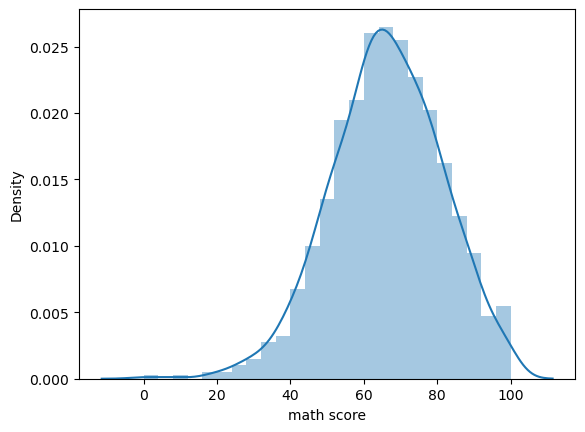

In [18]:
sns.distplot(data['math score'])

# Grouping the dataset by the Gender of the students and calculating the means corresponding to each genders

In [19]:
data.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [20]:
data['Avarage']=(data['math score']+data['reading score']+data['writing score'])/3

In [21]:
data[data['math score'] < 30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.000000
601,female,group C,high school,standard,none,29,29,30,29.333333


In [22]:
data_num = data[num_col]

In [23]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


# We will now check whether these numerical data are normally distributed or not

In [24]:
from  scipy.stats import normaltest

In [25]:
normaltest(data_num['math score'])[1]*100

0.04508029386993784

<AxesSubplot:xlabel='math score', ylabel='Density'>

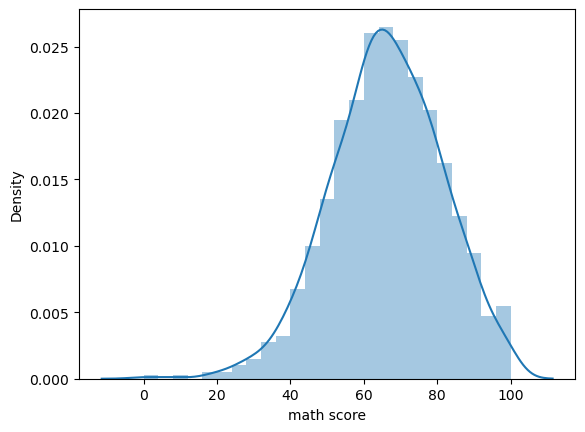

In [26]:
sns.distplot(data_num['math score'])

In [27]:
normaltest(data_num['reading score'])[1]*100

0.3853758403576582

<AxesSubplot:xlabel='reading score', ylabel='Density'>

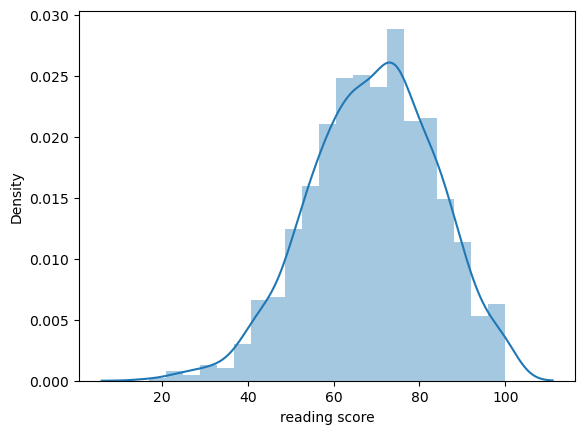

In [28]:
sns.distplot(data_num['reading score'])

In [29]:
normaltest(data_num['writing score'])[1]*100

0.11101885439899974

<AxesSubplot:xlabel='writing score', ylabel='Density'>

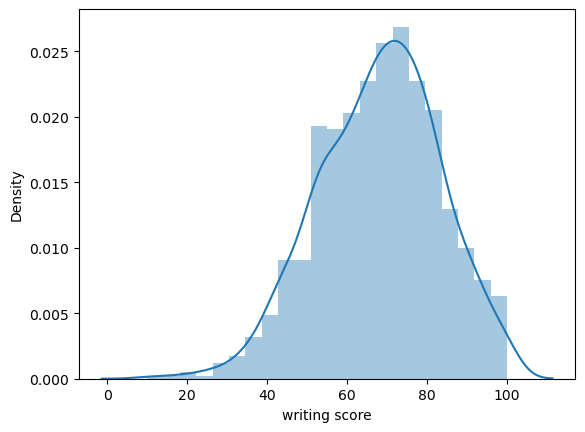

In [30]:
sns.distplot(data_num['writing score'])

# So Reading score & writing score data are normally distributed as the p values corresponding to these are greater than 0.05

<AxesSubplot:>

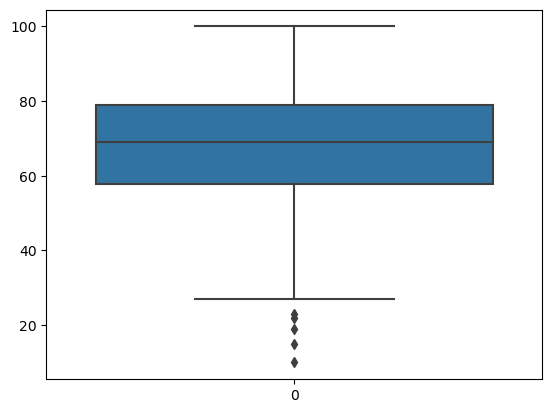

In [31]:
sns.boxplot(data=data['writing score'])

<AxesSubplot:>

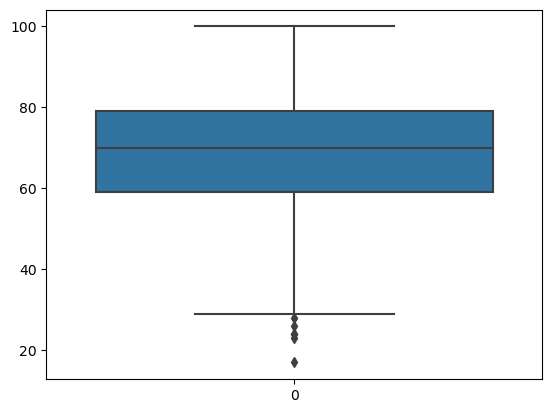

In [32]:
sns.boxplot(data=data['reading score'])

<AxesSubplot:>

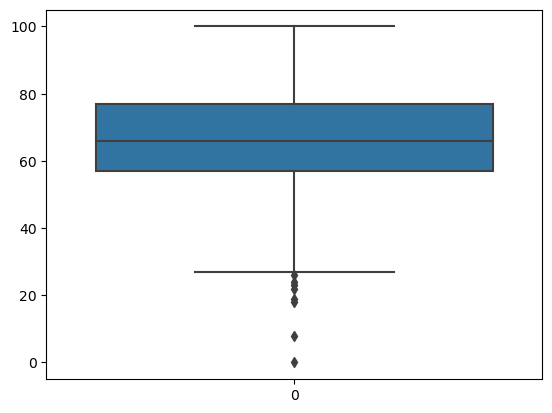

In [33]:
sns.boxplot(data=data['math score'])

# So the distributions are lest skewed & that means there are outliers

In [34]:
data['math score'].min()

0

In [35]:
data['math score'].max()

100

In [36]:
q1 = data['math score'].quantile(0.25)

In [37]:
q3 = data['math score'].quantile(0.75)

In [38]:
q1, q3

(57.0, 77.0)

In [39]:
IQR = q3-q1

In [40]:
upper_limit = q3+(1.5*IQR)

In [41]:
lower_limit = q1-(1.5*IQR)

In [42]:
upper_limit

107.0

In [43]:
lower_limit

27.0

In [44]:
data['math score']<lower_limit

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool

In [45]:
data_outlier=data[data['math score']<lower_limit]
data_outlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [46]:
data_num.drop(data_outlier.index)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [47]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [48]:
data['math score']>upper_limit

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool

In [49]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage


In [50]:
data['math score'].quantile(1.00)

100.0

In [51]:
data['math score'].min()

0

In [52]:
data['math score'].max()

100

In [53]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [54]:
data_num.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [55]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    IQR=q2-q1
    upper_limit=q2+(1.5*IQR)
    lower_limit=q1-(1.5*IQR)
    return lower_limit,upper_limit

In [56]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        lower_limit,upper_limit=outlier_threshold(data_num,variable)
        data.loc[data[variable]<lower_limit,variable]=lower_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit

In [57]:
replace_with_threshold(data_num,data_num.columns)

In [58]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [59]:
data_num.loc[data_num['math score']<lower_limit,'math score']

Series([], Name: math score, dtype: int64)

In [60]:
data_num.loc[data_num['math score']<lower_limit,'math score']=lower_limit

In [61]:
data_num

,math score,reading score,writing score
0,72,72,74.0
1,69,90,88.0
2,90,95,93.0
3,47,57,44.0
4,76,78,75.0
...,...,...,...
995,88,99,95.0
996,62,55,55.0
997,59,71,65.0
998,68,78,77.0


In [62]:
def identifying_treating_outliers(df,col,remove_or_fill_with_quartile):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_fence=q1-1.5*(iqr)
  upper_fence=q3+1.5*(iqr)
  if remove_or_fill_with_quartile=="drop":
    df.drop(df.loc[df[col]<lower_fence].index,inplace=True)
    df.drop(df.loc[df[col]>upper_fence].index,inplace=True)
  elif remove_or_fill_with_quartile=="fill":
    df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
    df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])

## Graph Analysis

In [63]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<AxesSubplot:xlabel='gender', ylabel='count'>

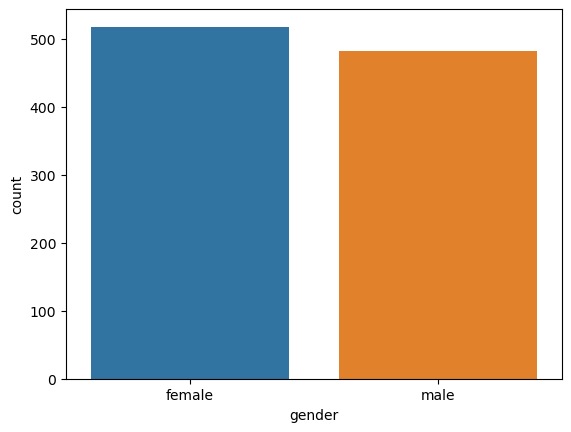

In [64]:
sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

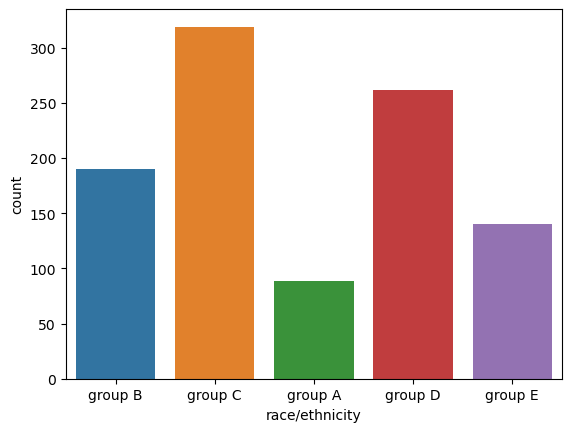

In [65]:
sns.countplot(data['race/ethnicity'])

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

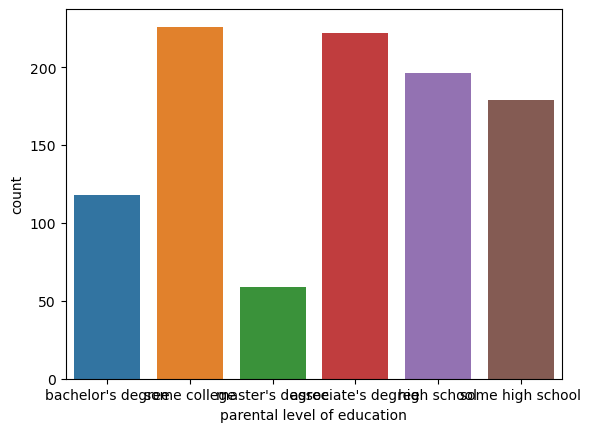

In [66]:
sns.countplot(data['parental level of education'])

In [67]:
df=data.groupby('gender').mean()
df

,math score,reading score,writing score,Avarage
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [68]:
df['Avarage'][0]

69.56949806949807

In [70]:
df['Avarage'][1]

65.8374827109267

In [71]:
df['math score'][0]

63.633204633204635

In [72]:
df['math score'][1]

68.72821576763485

In [78]:
male_score=df['Avarage'][1],df['math score'][1]

In [74]:
female_score=df['Avarage'][0],df['math score'][0]

<BarContainer object of 2 artists>

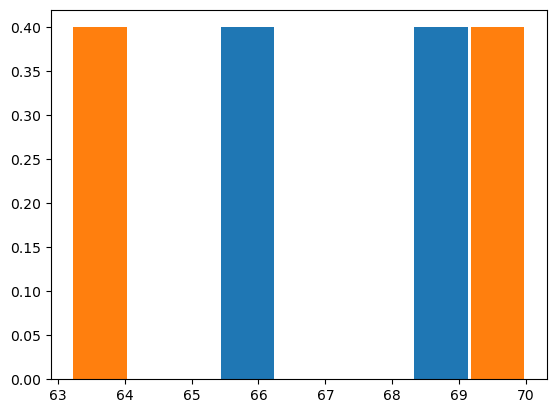

In [79]:
plt.bar(male_score,0.4,label='male')
plt.bar(female_score,0.4,label='female')

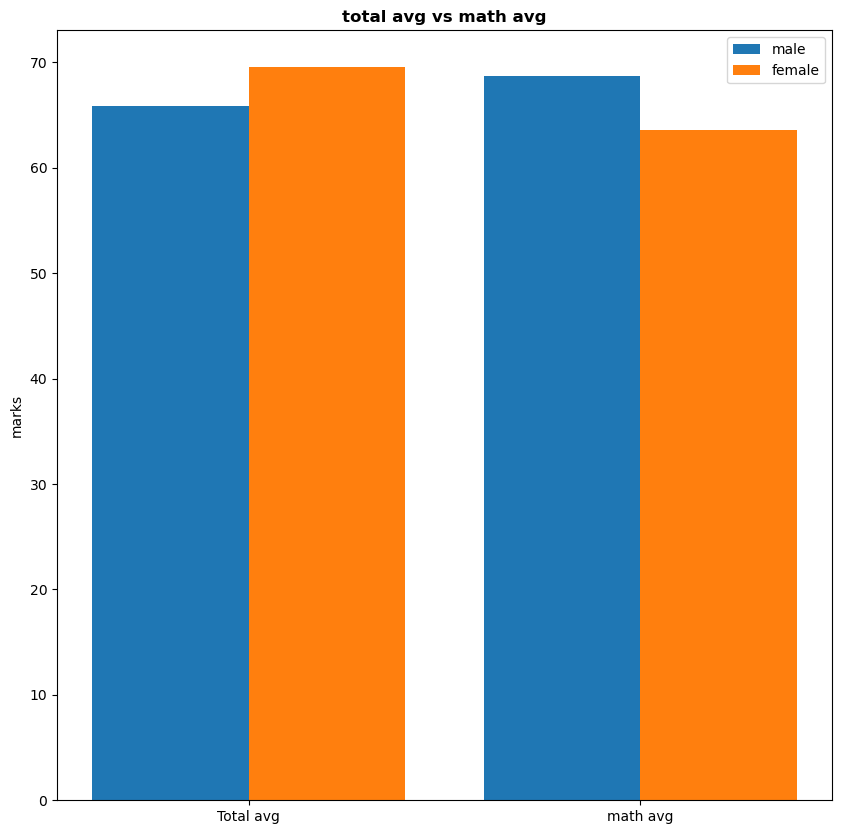

In [80]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
female_score=df['Avarage'][0],df['math score'][0]
male_score=df['Avarage'][1],df['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()

<AxesSubplot:>

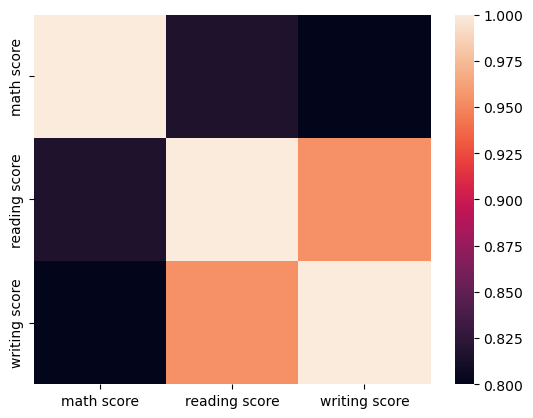

In [81]:
sns.heatmap(data_num.corr())

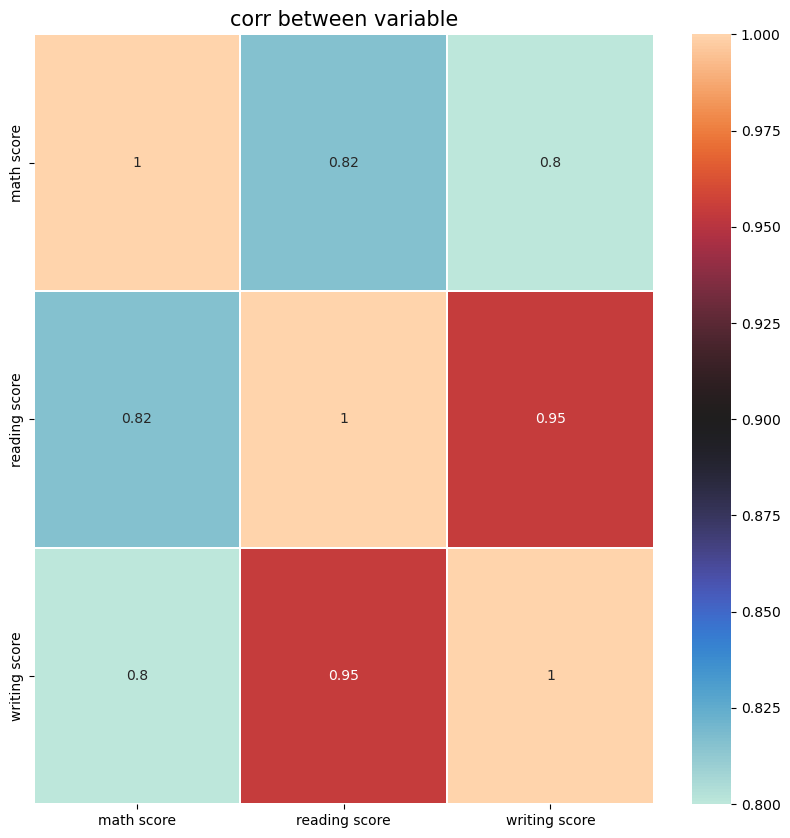

In [83]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

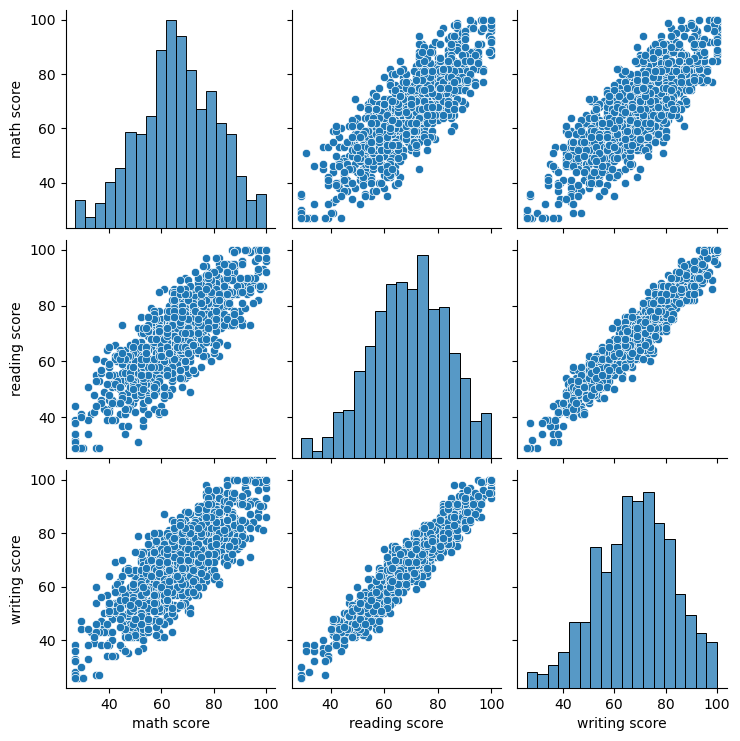

In [84]:
sns.pairplot(data_num)

<AxesSubplot:>

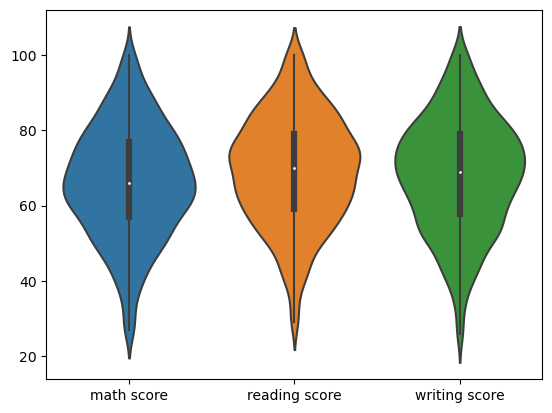

In [85]:
sns.violinplot(data=data_num)

In [86]:
import numpy as np
data_num.head()

,math score,reading score,writing score
0,72,72,74.0
1,69,90,88.0
2,90,95,93.0
3,47,57,44.0
4,76,78,75.0


<AxesSubplot:xlabel='math score', ylabel='Density'>

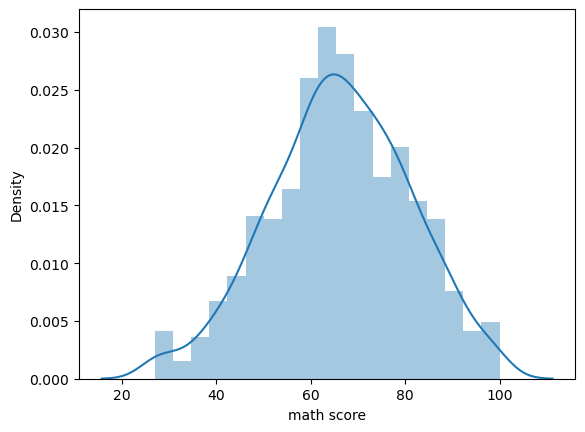

In [87]:
sns.distplot(data_num['math score'])

<AxesSubplot:xlabel='math score', ylabel='Density'>

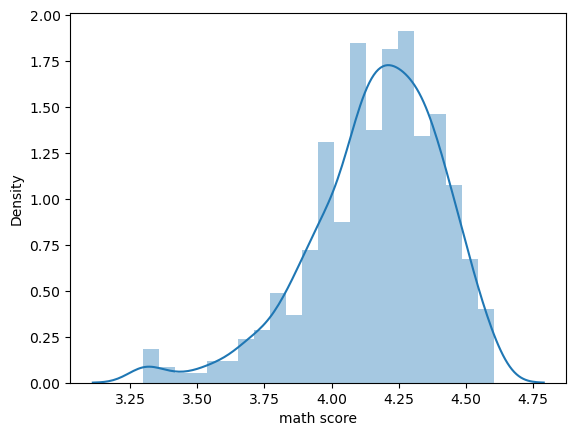

In [89]:
sns.distplot(np.log(data_num['math score']))

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_num)
scaler.transform(data_num)

array([[ 0.39121817,  0.19308472,  0.3921181 ],
       [ 0.19007772,  1.43478713,  1.3216816 ],
       [ 1.59806086,  1.77970446,  1.65366856],
       ...,
       [-0.48039044,  0.12410126, -0.20545843],
       [ 0.12303091,  0.60698553,  0.59131028],
       [ 0.72645225,  1.15885326,  1.18888681]])